<a href="https://colab.research.google.com/github/nruloff/MADS-ASL-FR/blob/main/Functions/Visualization_2_Graph_2%2C_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization Graph #1, #2, #4

Google Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [1]:
# Imports for Loading and Manipulating DataFrames
import pandas as pd
import os
import numpy as np

# Imports for More Data Manipulation
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Read in the merging dataset
df = pd.read_pickle('kaggle/working/train_and_supplemental.pkl')
df

,path,file_id,sequence_id,participant_id,phrase,sequence_length,Frame_Count,face_max_x,face_max_y,face_max_z,...,left_hand_max_z,left_hand_min_x,left_hand_min_y,left_hand_min_z,right_hand_max_x,right_hand_max_y,right_hand_max_z,right_hand_min_x,right_hand_min_y,right_hand_min_z
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse,12,123.0,0.545736,0.357443,-0.091394,...,NaN,NaN,NaN,NaN,-0.015004,0.391882,-0.660525,NaN,NaN,NaN
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah,15,127.0,0.407736,0.247818,-0.088162,...,NaN,NaN,NaN,NaN,0.060348,0.428531,-0.270945,NaN,NaN,NaN
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier,19,236.0,0.409836,0.325926,-0.104894,...,NaN,NaN,NaN,NaN,0.009426,0.370444,-0.351025,NaN,NaN,NaN
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane,17,102.0,0.361977,0.397479,-0.104400,...,NaN,NaN,NaN,NaN,0.024009,0.486761,-0.298526,NaN,NaN,NaN
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road,25,248.0,0.386222,0.403269,-0.083287,...,NaN,NaN,NaN,NaN,0.028612,0.492192,-0.230141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120161,supplemental_landmarks/2100073719.parquet,2100073719,1090866442,239,want to join us for lunch,25,127.0,0.227228,0.260042,-0.111400,...,NaN,NaN,NaN,NaN,-0.083640,0.397597,-0.503020,NaN,NaN,NaN
120162,supplemental_landmarks/2100073719.parquet,2100073719,1090966452,95,this phenomenon will never occur,32,237.0,0.450946,0.473740,-0.083656,...,NaN,NaN,NaN,NaN,0.070134,0.401442,-0.609239,NaN,NaN,NaN
120163,supplemental_landmarks/2100073719.parquet,2100073719,1091005846,40,the winner of the race,22,72.0,0.317271,0.349893,-0.084170,...,NaN,NaN,NaN,NaN,0.114874,0.465695,-0.304937,NaN,NaN,NaN
120164,supplemental_landmarks/2100073719.parquet,2100073719,1091011550,241,are you sure you want this,26,177.0,0.367911,0.274674,-0.081907,...,NaN,NaN,NaN,NaN,0.084720,0.334285,-0.215623,NaN,NaN,NaN


In [4]:
df.columns

Index(['path', 'file_id', 'sequence_id', 'participant_id', 'phrase',
       'sequence_length', 'Frame_Count', 'face_max_x', 'face_max_y',
       'face_max_z', 'face_min_x', 'face_min_y', 'face_min_z', 'pose_max_x',
       'pose_max_y', 'pose_max_z', 'pose_min_x', 'pose_min_y', 'pose_min_z',
       'left_hand_max_x', 'left_hand_max_y', 'left_hand_max_z',
       'left_hand_min_x', 'left_hand_min_y', 'left_hand_min_z',
       'right_hand_max_x', 'right_hand_max_y', 'right_hand_max_z',
       'right_hand_min_x', 'right_hand_min_y', 'right_hand_min_z'],
      dtype='object')

In [5]:
# Figure 1: Sequence Length VS Frame Count
fig = px.scatter(df, x='sequence_length', y='Frame_Count')
fig.update_layout(
    title={
        'text': 'Sequence Length vs Frame Count',
        'y':0.95, # y position of the title, higher value moves it up
        'x':0.5, # x position, 0.5 is the center
        'xanchor': 'center', # centers the text at the x coordinate
        'yanchor': 'top' # anchors the text at the top of the title space
    },
    xaxis_title='Sequence Length',
    yaxis_title='Frame Count'
)
fig.show()

In [7]:
# Using the plotly package, plot Top 23 phrases which are mostly performed by American Language Signer
phrase_counts = df['phrase'].value_counts().reset_index()
phrase_counts.columns = ['Phrase', 'Count']


phrase_counts = phrase_counts[phrase_counts['Count'] > 113]

# Create a bar graph using Plotly Express
fig = px.bar(phrase_counts, x='Phrase', y='Count')

# # Add x-axis title
# fig.update_xaxes(title_text='Phrase Category', tickangle=45)

# # Add y-axis title
# fig.update_yaxes(title_text='Count')

fig.update_layout(
    title={
        'text': 'Types of Phrase and Its Count',
        'font_size': 20,
        'y':0.95, # y position of the title, higher value moves it up
        'x':0.5, # x position, 0.5 is the center
        'xanchor': 'center', # centers the text at the x coordinate
        'yanchor': 'top' # anchors the text at the top of the title space
    },
    xaxis_title='Phrase',
    xaxis_tickangle=45,
    yaxis_title='Phrase Count'
)

print(len(phrase_counts))
fig.show()

23


In [8]:
#Check the video frame count of the most performed phrase, 'Find a nearby parking spot'

df_parking = df[df['phrase']=='find a nearby parking spot']
fig = px.scatter(df_parking, x='sequence_length', y='Frame_Count')
fig.update_layout(
    title={
        'text': 'Sequence Length vs Frame Count',
        'y':0.95, # y position of the title, higher value moves it up
        'x':0.5, # x position, 0.5 is the center
        'xanchor': 'center', # centers the text at the x coordinate
        'yanchor': 'top' # anchors the text at the top of the title space
    },
    xaxis_title='Sequence Length',
    yaxis_title='Frame Count'
)
fig.show()

In [9]:
# Types of Phrase and its frequency

# Assuming you have a DataFrame named 'df' with the data
phrase_counts = df['phrase'].value_counts().reset_index()
phrase_counts.columns = ['Phrase', 'Count']

# Count the number of occurrences for each 'Count' value
count_phrase = phrase_counts['Count'].value_counts().reset_index()
count_phrase.columns = ['Phrase Count', 'Frequency']

# Create a bar graph using Plotly Express
fig = px.bar(count_phrase, x='Phrase Count', y='Frequency', title='Types of Phrase')

# Add x-axis title
fig.update_xaxes(title_text='Phrase Count')

# Add y-axis title
fig.update_yaxes(title_text='Frequency')

# Show the figure
fig.show()


# Graph 4

### For the Venn Diagram, the function must be pre-defined.

In [10]:
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)

def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
    xy = [
        (x1, y1),
        (x2, y2),
        (x3, y3),
    ]
    polygon = patches.Polygon(
        xy=xy,
        closed=True,
        color=fillcolor)
    ax.add_patch(polygon)

def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1]):
    ax.text(
        x, y, text,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14,
        color=color)

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]
    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]
    return
      labels: a dict of labels for different sets
    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                             # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels


def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    """
    plots a 4-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
              hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi
    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''))
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''))
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''))
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''))
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''))
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''))
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''))
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''))
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''))
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''))
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''))
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''))
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''))
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''))
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''))

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0])
    draw_text(fig, ax, 0.18, 0.83, names[1])
    draw_text(fig, ax, 0.82, 0.83, names[2])
    draw_text(fig, ax, 0.87, 0.18, names[3])
    leg = ax.legend(names, loc='best', fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax


In [11]:
# Using the matplotlib, draw venn4 using the previously defined functions.

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

face = list(df[df['face_max_x'].isna()].index)
pose = list(df[df['pose_max_x'].isna()].index)
right = list(df[df['right_hand_max_x'].isna()].index)
left = list(df[df['left_hand_max_x'].isna()].index)

labels = get_labels([left, face, right, left], fill=['number', 'logic'])
fig, ax = venn4(labels, names=['LEFT HAND', 'FACE', 'POSE', 'RIGHT HAND'])
# ax.set_facecolor('#A9A9A9')
# fig.patch.set_facecolor('#A9A9A9')
fig.savefig('venn4.png', bbox_inches='tight')
plt.close()


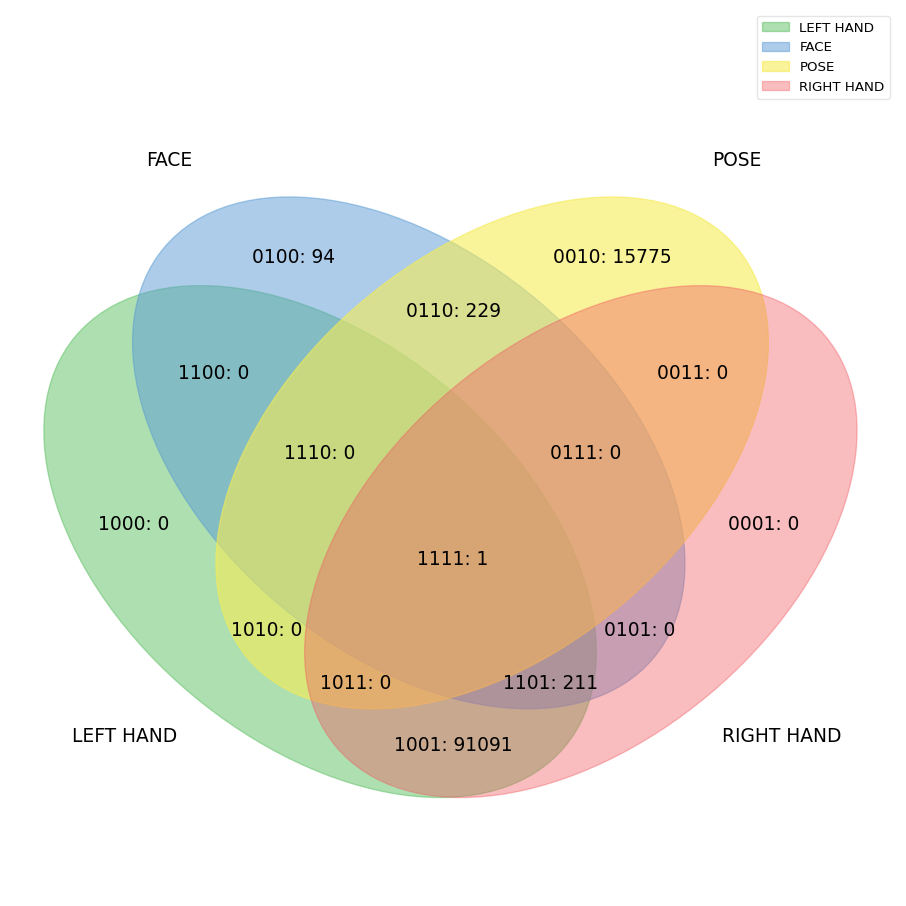

In [12]:
fig

In [13]:
# Check how many question marks in the phrases

question_mark = df[df['phrase'].str.contains('\\?')]['phrase']
question_mark

236      bori.andorka?locale=hu_hu&_rdr
412      /liyao.zhou?locale=zh_tw&_rdr/
653      natasha-legeyda-6706051?page=1
925        album-category/79611?lang=cs
1163       smartnet/petrit-loku?lang=ar
                      ...              
66538                    1046171?p=1096
66605          show_book.php?book=10017
66685                567943?imagelist=1
66879     34555-300/?k=funa+3d&related/
67108    nizan/course_detail.php?id=172
Name: phrase, Length: 301, dtype: object